In [56]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import cmath
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import cmath
import skimage.measure as skm
import scipy.misc
from scipy import ndimage
from skimage.util import random_noise
import random

CHEBOUTI BOUTHEINA _ NACEREDDINE AMIRA 
2eme année DSIA 

LECTURE ET AFFICHAGE DE L'IMAGE 

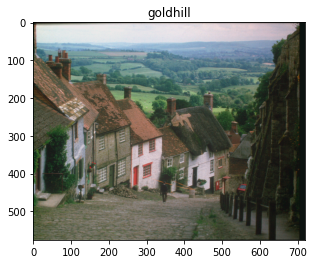

In [57]:
gold = cv.imread("goldhill.bmp")
#conversion des canal de BGR a RGB Car open cv les stockes dans l'ordre BGR
goldhill = cv.cvtColor(gold, cv.COLOR_BGR2RGB)
plt.title("goldhill")
plt.imshow(goldhill)

L" Ajoute d'un bruit gaussien à l’image de moyenne nulle et d’écart-type σ= 0.01.

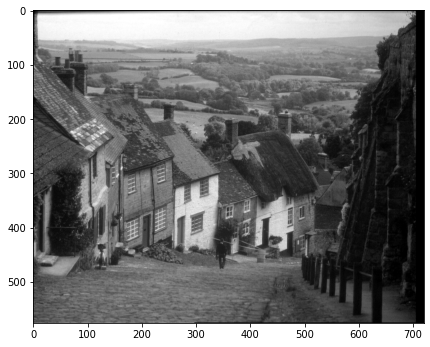

In [58]:
plt.figure(figsize = (7, 7))
img_g = cv.cvtColor(goldhill, cv.COLOR_RGB2GRAY)
plt.imshow(img_g, cmap="gray")

BRUIT GAUSSIEN 

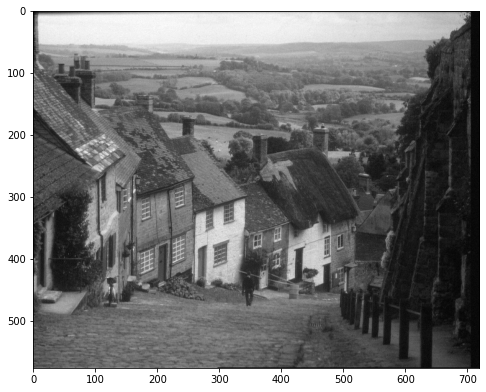

In [59]:
plt.figure(figsize=(8, 8))

moy = 0
std = 0.01
img_g=img_g/255 #pour nirmaliser les niveau de gris de l'image  par rapport au valeur du bruits

gaussian_noise = np.random.normal(moy, std, img_g.shape)

img_bruité = img_g + gaussian_noise
plt.imshow(img_bruité, cmap="gray")

3- Calcule de  la transformée de Fourier discrète de l’image

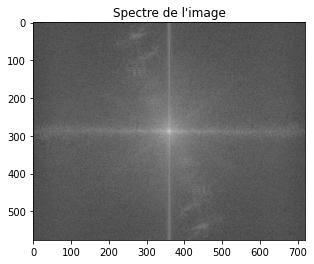

In [60]:
f = np.fft.fft2(img_bruité)
fshift = np.fft.fftshift(f)
mag_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(mag_spectrum,cmap='gray')
plt.title("Spectre de l'image")
plt.show()

5-la fonction de transfert du filtre H

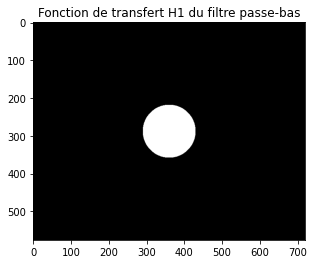

In [61]:
nl, nc = img_bruité.shape

D1 = 70
x = np.arange(-nl/2, nl/2, 1)
y = np.arange(-nc/2, nc/2, 1)
xx, yy = np.meshgrid(y, x, sparse=True)
z = np.sqrt(xx * xx + yy * yy)
H1 = z < D1
plt.title("Fonction de transfert H1 du filtre passe-bas")
plt.imshow(H1, cmap='gray')

6-Multiplication du spectre de l’image f par la fonction de transfert H

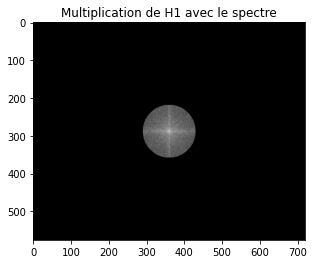

In [62]:
spectre_transfer_passebas = H1*mag_spectrum
plt.imshow(spectre_transfer_passebas,cmap='gray')
plt.title("Multiplication de H1 avec le spectre")
plt.show()

7- la transformée de Fourier inverse et afficher ainsi l’image filtrée

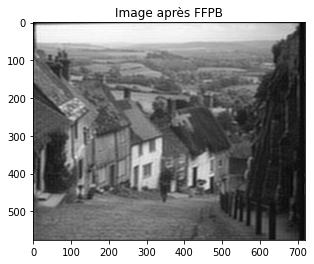

In [63]:

f_ishift_bas = np.fft.ifftshift(fshift*H1)
img_bas = np.fft.ifft2(f_ishift_bas)
img_bas = np.real(img_bas)
plt.imshow(img_bas,cmap='gray')
plt.title("Image après FFPB")
plt.show()

Filtre passe haut 

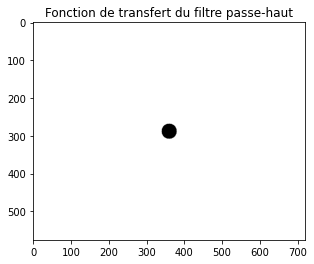

In [66]:
nl , nc = img_bruité.shape
D2 = 20
x = np.arange(-nl/2,nl/2,1)
y = np.arange(-nc/2,nc/2,1)
xx, yy = np.meshgrid(y, x, sparse=True)
z = np.sqrt(xx*xx+yy*yy)
H2 = z > D2
plt.imshow(H2,cmap='gray')
plt.title("Fonction de transfert du filtre passe-haut")
plt.show()

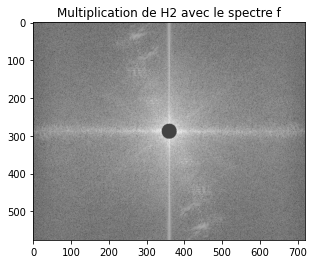

In [67]:
spectre_transfer_passehaut = H2*mag_spectrum
plt.imshow(spectre_transfer_passehaut,cmap='gray')
plt.title("Multiplication de H2 avec le spectre f")
plt.show()

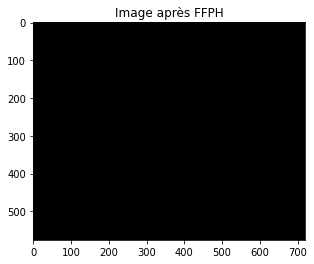

In [71]:
f_ishift_haut = np.fft.ifftshift(fshift*H2)
img_haut = np.fft.ifft2(f_ishift_haut)
img_haut = np.real(img_haut)

img_haut = np.uint8(img_haut)

plt.imshow(img_haut,cmap='gray')
plt.title("Image après FFPH")
plt.show()

passe bande 

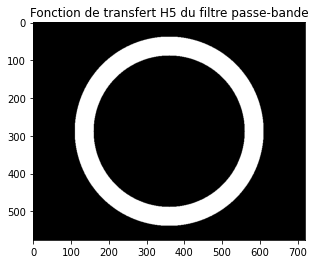

In [72]:
nl , nc = img_bruité.shape
D3 = 200
D4 = 250
x = np.arange(-nl/2,nl/2,1)
y = np.arange(-nc/2,nc/2,1)
xx, yy = np.meshgrid(y, x, sparse=True)
z = np.sqrt(xx*xx+yy*yy)
H3 = z < D4
H4 = D3 < z
H5 = H3*H4
plt.imshow(H5,cmap='gray')
plt.title("Fonction de transfert H5 du filtre passe-bande")
plt.show()

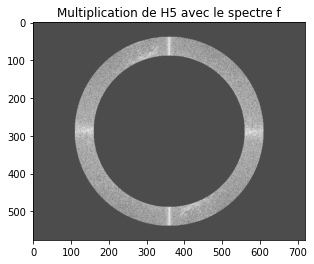

In [73]:
spectre_transfer_passebande = H5*mag_spectrum
plt.imshow(spectre_transfer_passebande,cmap='gray')
plt.title("Multiplication de H5 avec le spectre f")
plt.show()

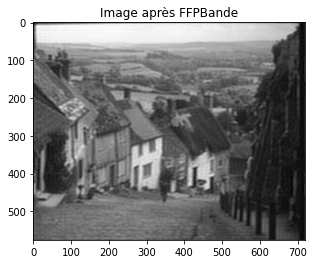

In [74]:
f_ishift_bande = np.fft.ifftshift(fshift*H5)
img_bande = np.fft.ifft2(f_ishift_bande)
img_bande = np.real(img_bande)
img_bande = np.uint8(img_bande)
plt.imshow(img_bas,cmap='gray')
plt.title("Image après FFPBande")
plt.show()

*Conclusion* :
Le filtrage en fréquence consiste à filtrer une image en modifiant son spectre, on applique donc le filtrage dans le domaine fréquentiel.
 on peut décider d’atténuer les hautes fréquences ou au contraire de les amplifier.

- Le principe du filtrage fréquentiel consiste à :

Calculer la TFD de l'image bruitée
Calculer la fonction de transfert H du filtre
Multiplier le spectre de l'image bruitée par H
Calculer la TFD inverse pour enfin avoir l'image filtrée
Il existe 3 types de filtres fréquentiels :

Filtres passe-bas
Filtres passe-haut
Filtres passe-bande
**Les filtres passe-bas** :

Un filtrage passe-bas consiste à conserver les basses fréquences et à supprimer les éléments de l'image qui sont décrits par des hautes fréquences, c'est-à-dire les détails, les textures et les contours. Il réalise donc un lissage (ou floutage) de l'image.

Plus on supprime de hautes fréquences, plus le filtre est étroit, plus le lissage est important, et donc plus l'image est floutée.

**Les filtres passe-haut** :

Inversement, le filtrage passe-haut consiste à conserver les hautes fréquences et supprimer les basses fréquences.

Il produit des valeurs proches de 0 dans les zones unies ou dégradées, qui correspondent aux basses fréquences supprimées par le filtrage, et conserve uniquement les éléments correspondant aux hautes fréquences dans l'image : les détails, textures et contours de l'image.

Le filtrage passe-haut est couramment utilisé pour l'extraction de contours.

**Les filtres passe-bande** :

Un filtre passe-bande est un filtre ne laissant passer qu’une bande ou intervalle de fréquences compris entre une fréquence de coupure basse et une fréquence de coupure haute du filtre.